In [24]:
!pip install imbalanced-learn -q

In [40]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score




In [27]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import RandomOverSampler

In [2]:
def describe_df(DataFrame):

    binary_feats = [col for col in DataFrame.columns if DataFrame[col].nunique() <= 2]
    categorical_feats = [col for col in DataFrame.columns if DataFrame[col].dtype == 'object' and col not in binary_feats]
    continuous_feats = [col for col in DataFrame.columns if DataFrame[col].dtype != 'object' and col not in binary_feats]

    print('Бинарные переменные:', binary_feats)
    print('Категориальные переменные:', categorical_feats)
    print('Количественные переменные:', continuous_feats, '\n')

    print('Количество столбцов:', DataFrame.shape[1])
    print('Количество строк:', DataFrame.shape[0], '\n')

    print('Пропуски:\n')
    print(DataFrame.isna().sum(),'\n')
    print('Дубликаты:', DataFrame.duplicated().sum(),'\n')
    print(f'\nТипы данных: \n{DataFrame.dtypes}')

    print('Описание:\n')
    display(DataFrame.describe())
    print()

    print('Dataframe начало\n')
    display(DataFrame.head())
    print()
    print('Dataframe конец\n')
    display(DataFrame.tail())

In [6]:
bank = pd.read_csv('bank.csv', sep = ';')
bank.name = 'bank'

In [7]:
describe_df(bank)

Бинарные переменные: ['default', 'housing', 'loan', 'y']
Категориальные переменные: ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
Количественные переменные: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'] 

Количество столбцов: 17
Количество строк: 4521 

Пропуски:

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64 

Дубликаты: 0 


Типы данных: 
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object
Описание:



,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000



Dataframe начало



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no



Dataframe конец



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [10]:
X = bank.drop('y', axis=1)
y = bank['y']

In [11]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

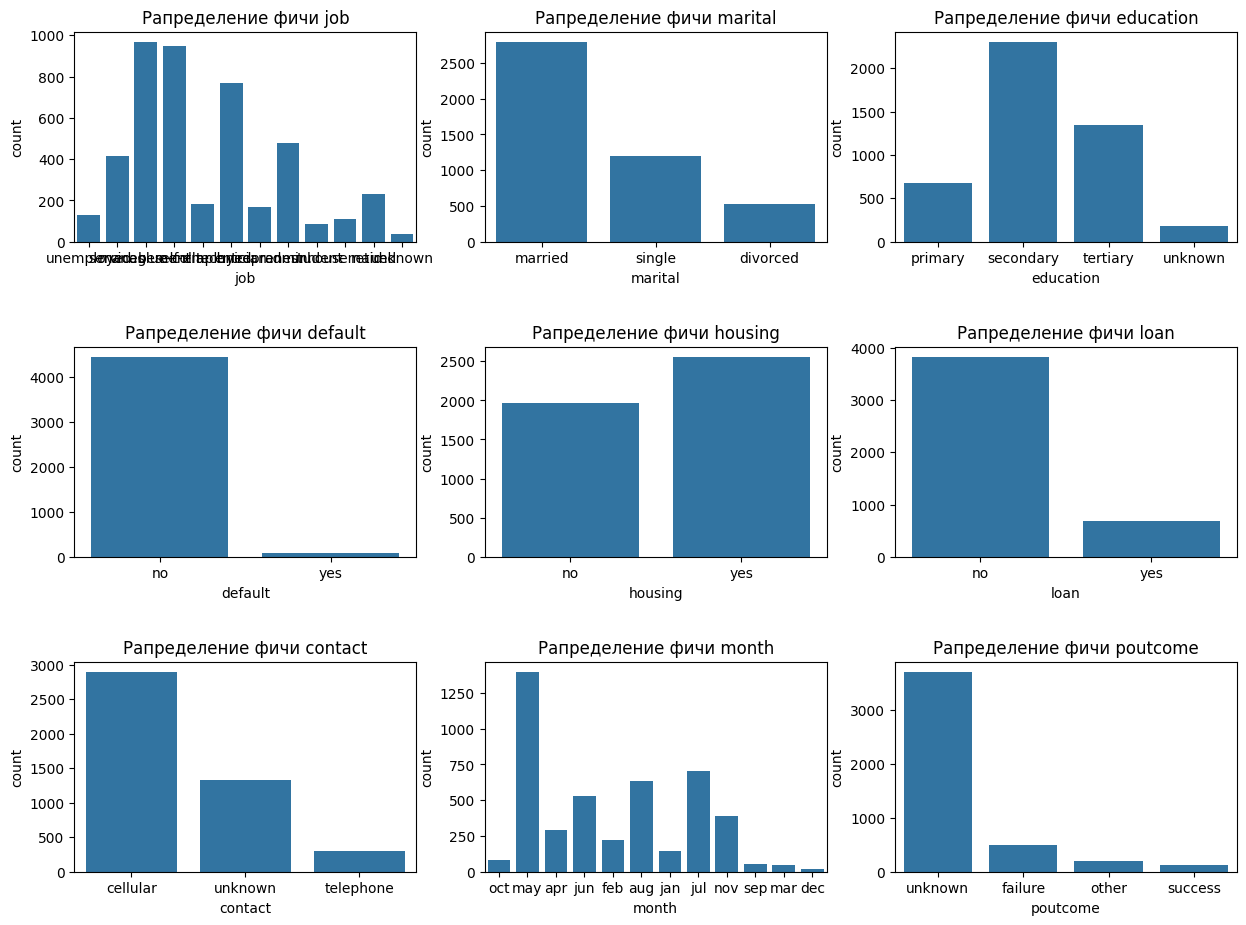

In [21]:
fig, axes = plt.subplots(nrows=len(categorical_features)//3 + 1, ncols=3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)

for i, feature in enumerate(categorical_features):
    row, col = i // 3, i % 3
    sns.countplot(x=feature, data=bank, ax=axes[row, col])
    axes[row, col].set_title(f'Рапределение фичи {feature}')

for i in range(len(categorical_features), len(axes.flat)):
    fig.delaxes(axes.flatten()[i])

plt.show()

for i, feature in enumerate(categorical_features):
    row, col = i // 3, i % 3
    sns.countplot(x=feature, data=bank, ax=axes[row, col])
    axes[row, col].set_title(f'Распределение фичи {feature}')



По данным графикам можно сделать несколько кратких выводов, полезных в контексте кредитного скоринга:

Работа (job): наблюдается сильная неоднородность (есть популярные категории вроде management, blue-collar и т.д.). При моделировании важно корректно кодировать эти категории (например, One-Hot Encoding) и учитывать, что редкие профессии могут плохо обобщаться.

Семейное положение (marital): основная часть клиентов — женатые/замужние. Возможна корреляция с платёжеспособностью (чаще у семейных стабильный доход), что может помочь при прогнозировании.

Образование (education): преобладают уровни secondary и tertiary, что также может указывать на уровень дохода и надёжность клиента.

Наличие дефолта (default): большинство клиентов не имеют прошлых дефолтов (значит признак сильно несбалансирован). Однако даже единичные случаи “yes” могут быть важны для точного прогноза риска.

Наличие кредита (loan): аналогично default — основная часть клиентов без кредита. Этот фактор может свидетельствовать о дополнительной долговой нагрузке, важной при оценке платёжеспособности.

Контакт (contact) и Результат предыдущей кампании (poutcome): данные категории относятся скорее к маркетинговой информации (способ связи, успех прошлых обращений), но в кредитном скоринге они могут косвенно отражать надёжность и вовлечённость клиента.

Месяц (month): в задачах скоринга может указывать на сезонность обращений и, например, влиять на активность клиентов или уровень риска в разные периоды года.

В целом, при построении модели важно учесть несбалансированность некоторых категорий (особенно “default” и “loan”), а также проработать редкие и «unknown» значения (возможно, объединить или обработать как пропуски). Всё это поможет улучшить точность и устойчивость кредитного скоринга.

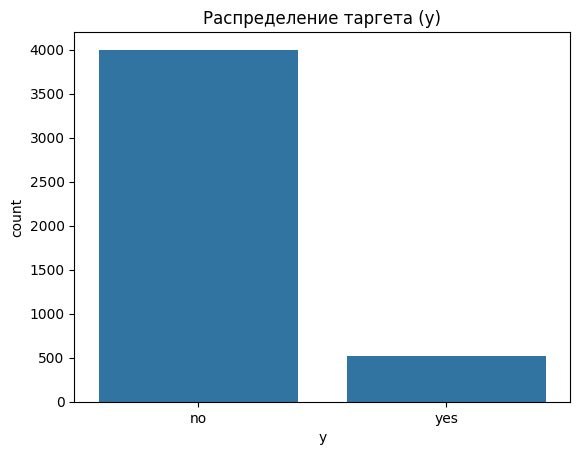

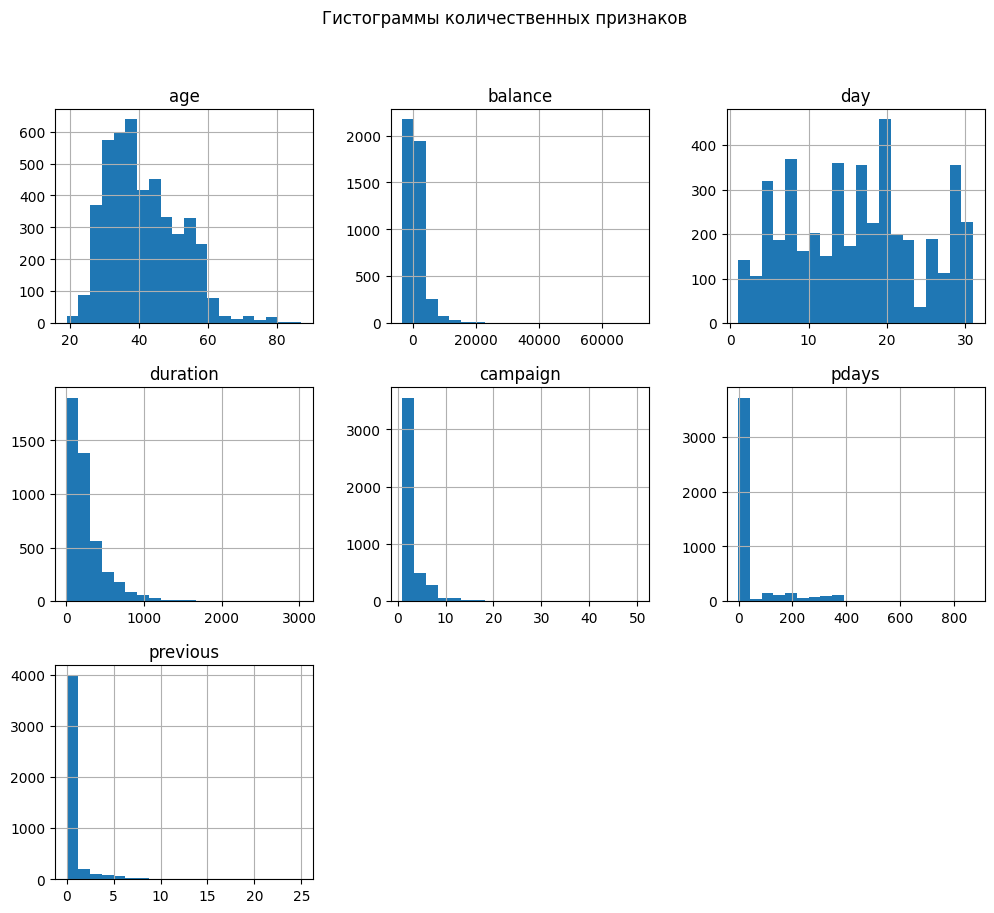

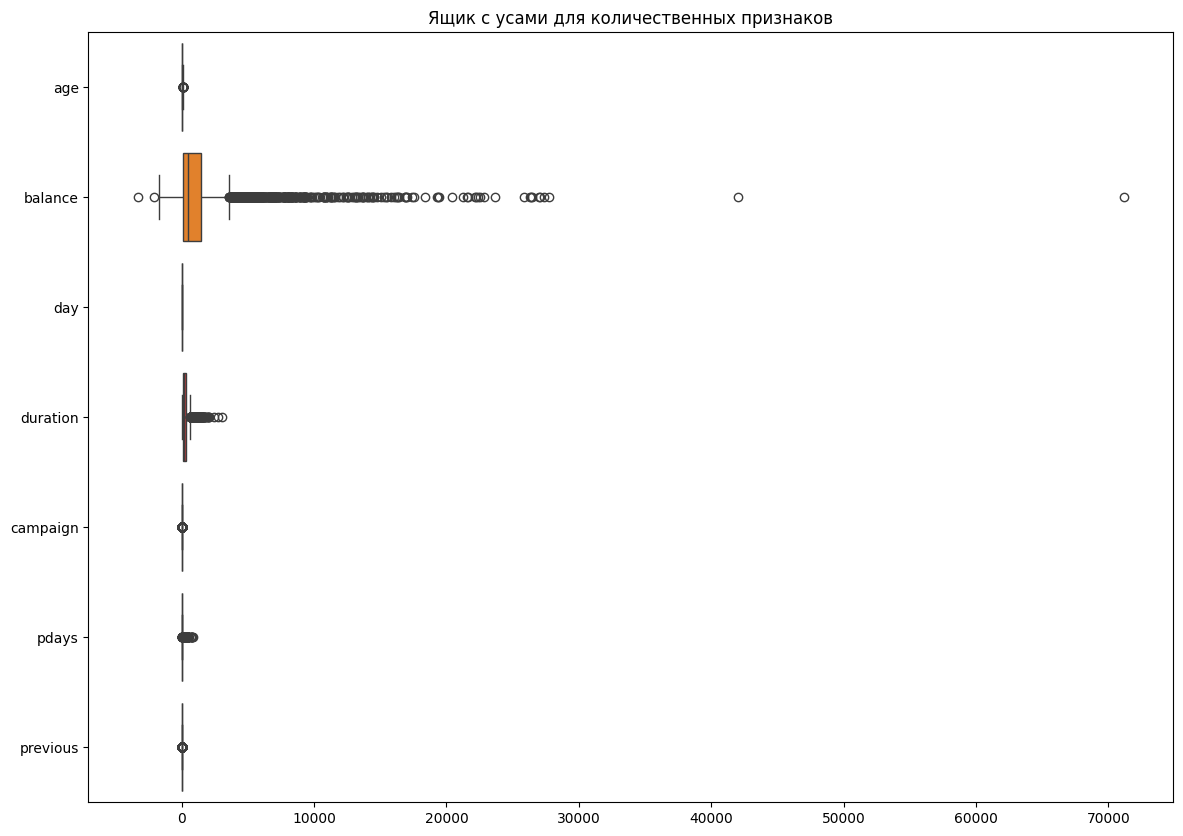

In [22]:
sns.countplot(x='y', data=bank)
plt.title('Распределение таргета (y)')
plt.show()

bank.hist(figsize=(12, 10), bins=20)
plt.suptitle('Гистограммы количественных признаков')
plt.show()

plt.figure(figsize=(14, 10))
sns.boxplot(data=bank, orient='h')
plt.title('Ящик с усами для количественных признаков')
plt.show()

In [28]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

In [29]:
pipelines = {
    'Logistic Regression': ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('oversampler', RandomOverSampler(random_state=42)),
        ('classifier', LogisticRegression(solver='liblinear', random_state=42))
    ]),
    'Random Forest': ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('oversampler', RandomOverSampler(random_state=42)),
        ('classifier', RandomForestClassifier(random_state=42))
    ]),
    'SVM': ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('oversampler', RandomOverSampler(random_state=42)),
        ('classifier', SVC(probability=True, random_state=42))
    ]),
    'kNN': ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('oversampler', RandomOverSampler(random_state=42)),
        ('classifier', KNeighborsClassifier())
    ])
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [30]:
for name, model in pipelines.items():
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    print(f"{name} Accuracy scores: {scores}")
    print(f"{name} Mean accuracy: {scores.mean():.4f}\n")

Logistic Regression Accuracy scores: [0.8320442  0.82743363 0.84513274 0.83738938 0.84070796]
Logistic Regression Mean accuracy: 0.8365

Random Forest Accuracy scores: [0.89392265 0.87721239 0.90486726 0.9170354  0.89048673]
Random Forest Mean accuracy: 0.8967

SVM Accuracy scores: [0.83867403 0.84623894 0.84181416 0.83517699 0.85951327]
SVM Mean accuracy: 0.8443

kNN Accuracy scores: [0.81436464 0.84070796 0.8329646  0.82190265 0.85176991]
kNN Mean accuracy: 0.8323



In [31]:
param_grid_lr = {
    'classifier__C': [0.1, 1, 10],
    'classifier__penalty': ['l1', 'l2']
}
grid_lr = GridSearchCV(pipelines['Logistic Regression'], param_grid_lr, cv=cv, scoring='accuracy')
grid_lr.fit(X, y)
print("Logistic Regression Best parameters:", grid_lr.best_params_)
print("Logistic Regression Best CV accuracy:", grid_lr.best_score_)

Logistic Regression Best parameters: {'classifier__C': 0.1, 'classifier__penalty': 'l1'}
Logistic Regression Best CV accuracy: 0.8374267833569646


In [32]:
param_grid_rf = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 5, 10]
}
grid_rf = GridSearchCV(pipelines['Random Forest'], param_grid_rf, cv=cv, scoring='accuracy')
grid_rf.fit(X, y)
print("Random Forest Best parameters:", grid_rf.best_params_)
print("Random Forest Best CV accuracy:", grid_rf.best_score_)

Random Forest Best parameters: {'classifier__max_depth': None, 'classifier__n_estimators': 100}
Random Forest Best CV accuracy: 0.8967048843690412


In [33]:
param_grid_svm = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf']
}
grid_svm = GridSearchCV(pipelines['SVM'], param_grid_svm, cv=cv, scoring='accuracy')
grid_svm.fit(X, y)
print("SVM Best parameters:", grid_svm.best_params_)
print("SVM Best CV accuracy:", grid_svm.best_score_)

SVM Best parameters: {'classifier__C': 10, 'classifier__kernel': 'rbf'}
SVM Best CV accuracy: 0.87237397936733


In [34]:
param_grid_knn = {
    'classifier__n_neighbors': [3, 5, 7]
}
grid_knn = GridSearchCV(pipelines['kNN'], param_grid_knn, cv=cv, scoring='accuracy')
grid_knn.fit(X, y)
print("kNN Best parameters:", grid_knn.best_params_)
print("kNN Best CV accuracy:", grid_knn.best_score_)

kNN Best parameters: {'classifier__n_neighbors': 3}
kNN Best CV accuracy: 0.853353786730553


In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [37]:
rf_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('oversampler', RandomOverSampler(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [38]:
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'balance', 'day',
                                                   'duration', 'campaign',
                                                   'pdays', 'previous']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome'])])),
                ('oversampler', RandomOverSampler(random_state=42)),
                ('classifier', RandomForestClassifier(random_state=42))])

In [41]:
y_pred = rf_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Test Accuracy: {accuracy:.4f}")

Random Forest Test Accuracy: 0.8906
